### Original Dependencies

In [1]:
from email.message import EmailMessage
import email
from pathlib import Path
import os
import email
import pandas as pd

### Parsing the Emails

In [2]:
#READING IN A DIRECTORY OF FILES
text_Files = []
for root, dirs, files in os.walk("..\\Case Study 3\\SpamAssassinMessages", topdown=False):
    for name in files:
        tmp1 = os.path.join(root,name)
        text_Files.append(tmp1)
    for item in dirs:
        print(item)

print("- " * 10, end='\n')

print("LIST OF FIRST 15 ITEMS")
iter_counter = 0
while iter_counter <= 15:
    print(iter_counter, text_Files[iter_counter], end='\n')
    iter_counter += 1

easy_ham
easy_ham_2
hard_ham
spam
spam_2
- - - - - - - - - - 
LIST OF FIRST 15 ITEMS
0 ..\Case Study 3\SpamAssassinMessages\easy_ham\00001.7c53336b37003a9286aba55d2945844c
1 ..\Case Study 3\SpamAssassinMessages\easy_ham\00002.9c4069e25e1ef370c078db7ee85ff9ac
2 ..\Case Study 3\SpamAssassinMessages\easy_ham\00003.860e3c3cee1b42ead714c5c874fe25f7
3 ..\Case Study 3\SpamAssassinMessages\easy_ham\00004.864220c5b6930b209cc287c361c99af1
4 ..\Case Study 3\SpamAssassinMessages\easy_ham\00005.bf27cdeaf0b8c4647ecd61b1d09da613
5 ..\Case Study 3\SpamAssassinMessages\easy_ham\00006.253ea2f9a9cc36fa0b1129b04b806608
6 ..\Case Study 3\SpamAssassinMessages\easy_ham\00007.37a8af848caae585af4fe35779656d55
7 ..\Case Study 3\SpamAssassinMessages\easy_ham\00008.5891548d921601906337dcf1ed8543cb
8 ..\Case Study 3\SpamAssassinMessages\easy_ham\00009.371eca25b0169ce5cb4f71d3e07b9e2d
9 ..\Case Study 3\SpamAssassinMessages\easy_ham\0001.ea7e79d3153e7469e7a9c3e0af6a357e
10 ..\Case Study 3\SpamAssassinMessages\easy_h

In [3]:
print(len(text_Files))

9353


In [4]:
# https://stackoverflow.com/questions/8924173/how-to-print-bold-text-in-python
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#USING THE EMAIL PACKAGE
for i in range(15):
    with open(text_Files[i],"r") as f:
        message = email.message_from_file(f)
        body = message.get_payload()
        
        print("-  -  " * 10, end='\n')
        print(color.BOLD + "BODY OF EMAIL FOLLOWS: " + color.END, body, sep='\n\n')
        print("- " * 10, end='\n')

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
BODY OF EMAIL FOLLOWS: 

    Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...

delta

In [5]:
file_content = []
file_dtype = []
file_lbl = []
for root, dirs, files in os.walk("..\\Case Study 3\\SpamAssassinMessages"):
    for name in files:
        with open(os.path.join(root,name),'r') as f:
            try:
                x2 = email.message_from_file(f)
            except UnicodeDecodeError:  
                pass
            if "multipart" in x2.get_content_type():
                pass
            elif "text/plain" in x2.get_content_type(): 
                file_content.append(x2.get_payload().replace("\n"," "))
            file_dtype.append(x2.get_content_type())
            if "ham" in root:
                file_lbl.append(1)
            elif "spam" in root:
                file_lbl.append(0)
            else:
                print("LBL Not found.")

In [6]:
contents = pd.DataFrame(file_content)
types = pd.DataFrame(file_dtype)
labels = pd.DataFrame(file_lbl)

### Exploratory Data Analysis (EDA)

In [7]:
print("Contents DF")
display(contents.head())

Contents DF


,0
0,"Date: Wed, 21 Aug 2002 10:54:46 -05..."
1,"Martin A posted: Tassos Papadopoulos, the Gree..."
2,Man Threatens Explosion In Moscow Thursday A...
3,Klez: The Virus That Won't Die Already the m...
4,"> in adding cream to spaghetti carbonara, whi..."


In [8]:
print("Data Types DF")
display(types.head())

Data Types DF


,0
0,text/plain
1,text/plain
2,text/plain
3,text/plain
4,text/plain


In [9]:
print("Labels DF")
labels.head()

Labels DF


,0
0,1
1,1
2,1
3,1
4,1


In [10]:
types.rename(columns={types.columns[0]: "Types"}, inplace = True)
contents.rename(columns={contents.columns[0]: "Contents"}, inplace = True)
labels.rename(columns={labels.columns[0]: "Labels"}, inplace = True)

In [11]:
dataframes = [contents, types, labels]
result = pd.concat(dataframes, axis=1)

In [12]:
result.head()

,Contents,Types,Labels
0,"Date: Wed, 21 Aug 2002 10:54:46 -05...",text/plain,1
1,"Martin A posted: Tassos Papadopoulos, the Gree...",text/plain,1
2,Man Threatens Explosion In Moscow Thursday A...,text/plain,1
3,Klez: The Virus That Won't Die Already the m...,text/plain,1
4,"> in adding cream to spaghetti carbonara, whi...",text/plain,1


In [13]:
a = result['Types'].value_counts()
print(color.BOLD + "Distribution (Percentages) of values in Types column" + color.END)
for nums in a:
    b = a / len(result['Types']) * 100
    print(b)
    break

Distribution (Percentages) of values in Types column
text/plain                     79.151075
text/html                      12.819416
multipart/alternative           3.506896
multipart/mixed                 1.935208
multipart/signed                1.924516
multipart/related               0.598738
multipart/report                0.053459
text/plain charset=us-ascii     0.010692
Name: Types, dtype: float64


TAKE NOTE OF THE CLASS IMBALANCE, 75% HAM...25% SPAM

In [14]:
c = result['Labels'].value_counts()
print(color.BOLD + "Distribution (Percentages) of values in Labels column" + color.END)
for nums in c:
    d = c / len(result['Labels']) * 100
    print(d, "Ham is 1, Spam is 0", sep='\n\n')
    break

Distribution (Percentages) of values in Labels column
1    74.350476
0    25.649524
Name: Labels, dtype: float64

Ham is 1, Spam is 0


In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9353 entries, 0 to 9352
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  7404 non-null   object
 1   Types     9353 non-null   object
 2   Labels    9353 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 219.3+ KB


In [16]:
result.shape

(9353, 3)

In [17]:
result['Labels'].value_counts()

1    6954
0    2399
Name: Labels, dtype: int64

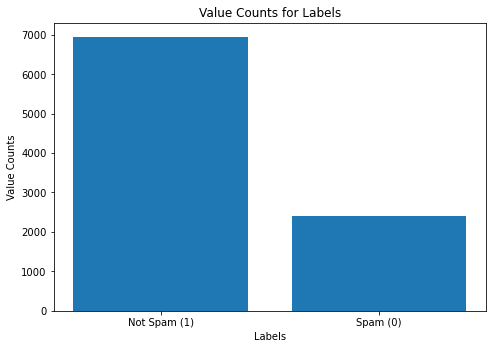

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Labels = ['Not Spam (1)', 'Spam (0)']
Value_Count = [6954,2399]
ax.bar(Labels,Value_Count)
ax.set_xlabel('Labels')
ax.set_ylabel('Value Counts')
ax.set_title('Value Counts for Labels')
plt.show()

In [19]:
print(color.BOLD + "Distribution (Percentages) of missing values in results dataframe" + color.END)
(result.isna().sum()/len(result)) * 100

Distribution (Percentages) of missing values in results dataframe


Contents    20.838234
Types        0.000000
Labels       0.000000
dtype: float64

In [20]:
# Imputing values into the missing areas for our contents
# USED EXCEL TO FILL IN MISSING VALUES BASED ON THEIR CORRESPONDING LABELS, AS WELL AS CONVERTED THE CONTENTS TO LOWERCASE
edited = pd.read_excel("editedDF.xlsx")

In [21]:
edited.head()

,Contents,Types,Labels
0,//this function should print all numbers up t...,multipart/alternative,1
1,(this list is sponsored by ironclad networks h...,multipart/alternative,1
2,david asked: > my wife noticed something odd. ...,multipart/alternative,1
3,"on mon, 16 sep 2002, stephen d. williams wrote...",multipart/alternative,1
4,">>>>> ""e"" == eirikur hallgrimsson <eh@mad.scie...",multipart/alternative,1


In [22]:
edited['Types'].value_counts()

text/plain                     7403
text/html                      1199
multipart/alternative           328
multipart/mixed                 181
multipart/signed                180
multipart/related                56
multipart/report                  5
text/plain charset=us-ascii       1
Name: Types, dtype: int64

In [23]:
edited.head()

,Contents,Types,Labels
0,//this function should print all numbers up t...,multipart/alternative,1
1,(this list is sponsored by ironclad networks h...,multipart/alternative,1
2,david asked: > my wife noticed something odd. ...,multipart/alternative,1
3,"on mon, 16 sep 2002, stephen d. williams wrote...",multipart/alternative,1
4,">>>>> ""e"" == eirikur hallgrimsson <eh@mad.scie...",multipart/alternative,1


### NORMALISING TEXT & STOP WORD REMOVAL

#### MODELING WITH SVM

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(edited['Contents'], edited['Labels'], test_size = 0.1, random_state = 1)

# training the vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
xtrain = vect.fit_transform(xtrain)

In [25]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(xtrain, ytrain)

SVC(C=1000)

In [26]:
from sklearn.metrics import confusion_matrix as cm
xtest = vect.transform(xtest)
y_pred = svm.predict(xtest)
print(cm(ytest, y_pred))

[[236   0]
 [  7 693]]


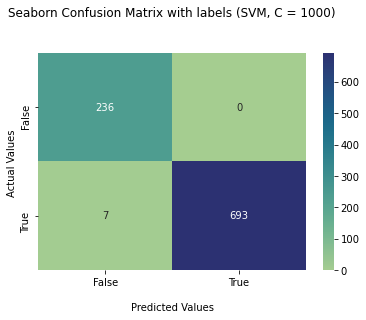

In [27]:
x = cm(ytest, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(x, annot=True, cmap='crest', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels (SVM, C = 1000)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [28]:
from sklearn.metrics import classification_report as cr
print(color.BOLD + "SVM Confusion Matrix w/ Metrics, C = 1000" + color.END)
print(cr(ytest, y_pred))

SVM Confusion Matrix w/ Metrics, C = 1000
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       236
           1       1.00      0.99      0.99       700

    accuracy                           0.99       936
   macro avg       0.99      0.99      0.99       936
weighted avg       0.99      0.99      0.99       936



#### Mulitnomial Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
MNB = MultinomialNB()

alpha = 1
for i in range(5):
    MNB.alpha=alpha
    MNB.fit(xtrain, ytrain)
    preds = MNB.predict(xtest)
    print(f"Alpha: {alpha}: {cr(ytest, preds)}")
    steps = [.8, .6, .4, .2]
    alpha = steps[i]

Alpha: 1:               precision    recall  f1-score   support

           0       0.95      0.75      0.84       236
           1       0.92      0.99      0.95       700

    accuracy                           0.93       936
   macro avg       0.93      0.87      0.90       936
weighted avg       0.93      0.93      0.92       936

Alpha: 0.8:               precision    recall  f1-score   support

           0       0.94      0.80      0.86       236
           1       0.94      0.98      0.96       700

    accuracy                           0.94       936
   macro avg       0.94      0.89      0.91       936
weighted avg       0.94      0.94      0.93       936

Alpha: 0.6:               precision    recall  f1-score   support

           0       0.94      0.90      0.92       236
           1       0.97      0.98      0.97       700

    accuracy                           0.96       936
   macro avg       0.95      0.94      0.95       936
weighted avg       0.96      0.96      0

IndexError: list index out of range